In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy.stats as st
from sklearn import ensemble, tree, linear_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [2]:
folder_path = 'fixed-time-dataset'
file_name = '11_oktomvri.csv'

drop_columns = ['noise_dba']

In [3]:
df = pd.read_csv(f'{folder_path}/{file_name}', parse_dates=['date_time'], index_col='date_time').drop(columns = drop_columns)

In [4]:
df.head()

,sensor_id,lat,log,temperature,noise,pm10,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,54,85,56.0,75,88.534158,3.000000,1020.262889,-60.352424,0.0,983.889298,0.0,0.0,268.620340,4.947778,78.943889
2017-11-09 00:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,63,71,56.0,64,88.726425,3.000000,1020.339086,-58.482791,0.0,983.947339,0.0,0.0,269.554467,4.427778,83.363889
2017-11-09 01:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,NaN,41,43,56.0,38,89.066025,2.986333,1020.412789,-56.399951,0.0,984.011669,0.0,0.0,270.063361,4.091111,86.817778
2017-11-09 01:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,42,55.0,36,89.455443,2.908583,1020.484463,-54.133954,0.0,984.080274,0.0,0.0,270.253975,4.609444,85.781111
2017-11-09 01:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,51,42,55.0,37,89.798009,2.830833,1020.554562,-51.713857,0.0,984.151176,0.0,0.0,270.231231,5.127778,84.744444


In [5]:
df['temperature'] = df['temperature'].interpolate(method='linear')
df['humidity'] = df['humidity'].interpolate(method='linear')
df['visibility'] = df['visibility'].interpolate(method='linear')
df['pm25'] = df['pm25'].interpolate(method='linear')

In [6]:
df.dropna()

,sensor_id,lat,log,temperature,noise,pm10,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,54,85,56.0,75,88.534158,3.000000,1020.262889,-60.352424,0.0,983.889298,0.0,0.0,268.620340,4.947778,78.943889
2017-11-09 00:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,63,71,56.0,64,88.726425,3.000000,1020.339086,-58.482791,0.0,983.947339,0.0,0.0,269.554467,4.427778,83.363889
2017-11-09 01:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,43,56.0,38,89.066025,2.986333,1020.412789,-56.399951,0.0,984.011669,0.0,0.0,270.063361,4.091111,86.817778
2017-11-09 01:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,41,42,55.0,36,89.455443,2.908583,1020.484463,-54.133954,0.0,984.080274,0.0,0.0,270.253975,4.609444,85.781111
2017-11-09 01:30:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,15.0,51,42,55.0,37,89.798009,2.830833,1020.554562,-51.713857,0.0,984.151176,0.0,0.0,270.231231,5.127778,84.744444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,48,17,99.0,14,57.761531,3.000000,1019.622560,-52.704789,0.0,982.522899,0.0,0.0,331.080483,10.000000,25.000000
2022-03-02 23:00:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,46,17,99.0,13,58.178665,3.000000,1019.584280,-53.676069,0.0,982.483911,0.0,0.0,329.667205,10.000000,25.000000
2022-03-02 23:15:00,200cdb67-8dc5-4dcf-ac62-748db636e04e,41.975155,21.456479,24.0,45,17,99.0,13,58.549056,3.000000,1019.553725,-54.341168,0.0,982.452439,0.0,0.0,330.618992,10.000000,25.000000


In [7]:
df.isnull().sum()

sensor_id                0
lat                      0
log                      0
temperature              0
noise                    0
pm10                     0
humidity                 0
pm25                     0
relative_humidity        0
wind_speed               0
sea_level_pressure       0
solar_elevation_angle    0
solar_radiation          0
pressure                 0
snow                     0
uv                       0
wind_direction           0
visibility               0
clouds                   0
dtype: int64

In [8]:
pm10_mean = df['pm10'].mean()
pm10_std = df['pm10'].std()

df = df[(df['pm10'] > (pm10_mean - 3 * pm10_std)) & (df['pm10'] < (pm10_mean + 3 * pm10_std))] #outliers removal

In [9]:
def move_to_first_column(name, df):
    first_column = df.pop(name)
    df.insert(0, name, first_column)
    return df

def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    
    return np.array(X), np.array(y)

def plot_predictions(model, X, y, y_df_test, start = 0, end = 100):
    predictions = model.predict(X)
    p_preds = predictions[:, 0]
    p_actuals = y[:, 0]
    n_preds = predictions[:, 1]
    n_actuals = y[:, 1]
    
    list_Year = [str(i).split(" ")[0][0:4] for i in list(y_df_test.index)]
    list_YM = [str(i).split(" ")[0][:-3] for i in  list(y_df_test.index)]
    
    df = pd.DataFrame(data = {'PM10 predictions': p_preds,
                                 'PM10 actuals': p_actuals,
                              'Noise predictions': n_preds,
                              'Noise actuals': n_actuals,
                                'sensor_id': y_df_test['sensor_id'],
                              'log': y_df_test['log'],
                              'lat': y_df_test['lat']
                             })
    
    df['Year'] = list_Year
    df['YM'] = list_YM
    
    df_yearly = df.groupby(['sensor_id', 'lat', 'log', 'Year', 'YM']).mean()
    df_yearly = df_yearly[['PM10 predictions', 'PM10 actuals', 'Noise predictions', 'Noise actuals']].reset_index()
    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(14,8)})

    ax = sns.lineplot(data=df_yearly, x ='YM', y = 'PM10 predictions', label = 'PM10 predicted values')
    bx = sns.lineplot(data=df_yearly, x ='YM', y = 'PM10 actuals', label = 'PM10 actual values')
    cx = sns.lineplot(data=df_yearly, x ='YM', y = 'Noise predictions', label = 'Noise predicted values')
    dx = sns.lineplot(data=df_yearly, x ='YM', y = 'Noise actuals', label = 'Noise actual values')


    plt.legend(bbox_to_anchor=(1, 1))
    plt.ylabel('PM10 (µg/m3)')
    plt.xlabel('Year')
    plt.legend(loc="upper left")
    plt.show()

    return df

def preprocess_output(y, X):
    p_training_mean = np.mean(X[:, :, 0])
    p_training_std = np.std(X[:, :, 0])
    y[:, 0] = np.abs((y[:, 0] - p_training_mean) / p_training_std)
    return y

In [10]:
df = move_to_first_column('noise', df)
df = move_to_first_column('pm10', df)

In [11]:
y_df = df.iloc[24:, :]
df.drop(columns = ['sensor_id', 'lat', 'log'], inplace = True)

In [12]:
scaler = MinMaxScaler()
df[list(df.columns)[1:]] = scaler.fit_transform(df[list(df.columns)[1:]])
df.head()

,pm10,noise,temperature,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,85,0.220238,0.469388,0.516854,0.340909,0.818695,0.113164,0.498549,0.077042,0.0,0.812181,0.0,0.0,0.659931,0.309236,0.789439
2017-11-09 00:45:00,71,0.273810,0.469388,0.516854,0.290909,0.820693,0.113164,0.499968,0.090144,0.0,0.812629,0.0,0.0,0.661751,0.276736,0.833639
2017-11-09 01:00:00,43,0.142857,0.469388,0.516854,0.172727,0.824221,0.112648,0.501341,0.104740,0.0,0.813125,0.0,0.0,0.662742,0.255694,0.868178
2017-11-09 01:15:00,42,0.142857,0.469388,0.505618,0.163636,0.828266,0.109716,0.502677,0.120620,0.0,0.813655,0.0,0.0,0.663113,0.288090,0.857811
2017-11-09 01:30:00,42,0.202381,0.469388,0.505618,0.168182,0.831825,0.106783,0.503983,0.137579,0.0,0.814202,0.0,0.0,0.663069,0.320486,0.847444


In [13]:
X, y = df_to_X_y(df, window_size = 24) # 6 hours
X.shape, y.shape

((147109, 24, 16), (147109, 2))

In [14]:
X_train, y_train = X[:round(len(X)*0.7)], y[:round(len(y)*0.7)] #70%
X_val, y_val = X[round(len(X)*0.7):round(len(X)*0.9)], y[round(len(y)*0.7):round(len(y)*0.9)]
X_test, y_test = X[round(len(X)*0.9):], y[round(len(y)*0.9):]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((102976, 24, 16),
 (29422, 24, 16),
 (14711, 24, 16),
 (102976, 2),
 (29422, 2),
 (14711, 2))

In [15]:
input_size = (24, 16)
output_size = 2

In [16]:
y_test_df = y_df.iloc[round(len(X) * 0.9):, :]

In [17]:
preprocess_output(y_train, X)
preprocess_output(y_val, X)
preprocess_output(y_test, X)

array([[0.37726062, 0.18452381],
       [0.37726062, 0.16666667],
       [0.44419668, 0.19642857],
       ...,
       [0.37726062, 0.16666667],
       [0.37726062, 0.16666667],
       [0.31032456, 0.13690476]])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 48s 14ms/step - loss: 0.0814 - root_mean_squared_error: 0.2854 - mean_absolute_percentage_error: 665.9141 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2075 - val_mean_absolute_percentage_error: 61.4322
Epoch 2/10
3218/3218 [=============================

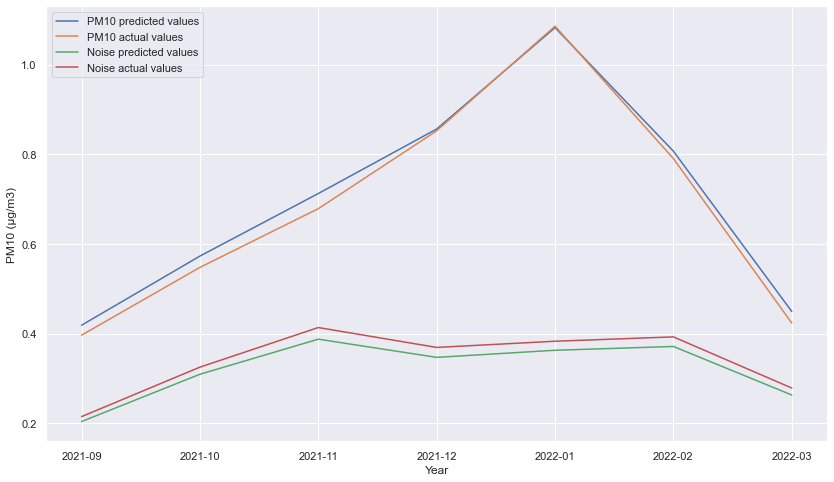

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.291982,0.377261,0.110833,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.363702,0.377261,0.132573,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.379124,0.444197,0.126378,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.433118,0.354949,0.146676,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.389427,0.421885,0.142669,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.413911,0.377261,0.133187,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.401020,0.377261,0.148716,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.398134,0.377261,0.141812,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [18]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 44s 13ms/step - loss: 0.0597 - root_mean_squared_error: 0.2443 - mean_absolute_percentage_error: 883.2488 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2097 - val_mean_absolute_percentage_error: 64.0272
Epoch 2/10
3218/3218 [===========================

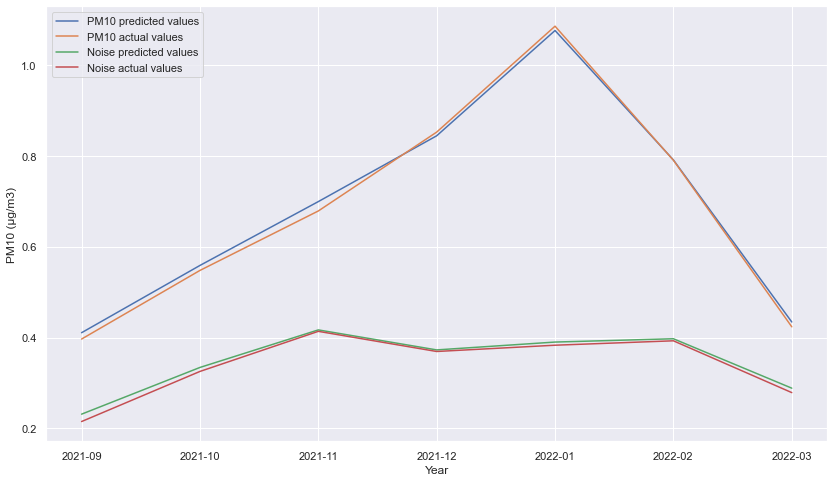

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.281697,0.377261,0.151178,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.358657,0.377261,0.180712,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.373668,0.444197,0.169700,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.431626,0.354949,0.187352,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.385657,0.421885,0.179206,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.410966,0.377261,0.165800,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.404841,0.377261,0.181812,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.402233,0.377261,0.175638,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [19]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 43s 13ms/step - loss: 0.1887 - root_mean_squared_error: 0.4343 - mean_absolute_percentage_error: 1228.7133 - val_loss: 0.0905 - val_root_mean_squared_error: 0.3008 - val_mean_absolute_percentage_error: 81.7280
Epoch 2/10
3218/3218 [==========================

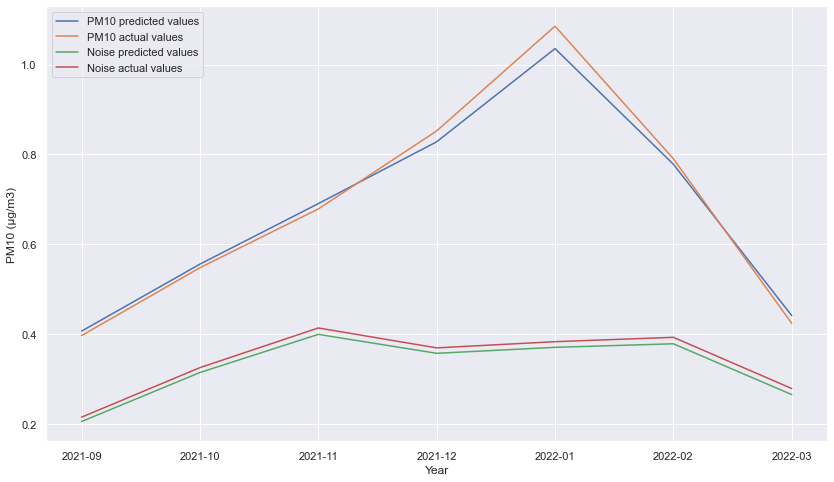

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.282585,0.377261,0.139687,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.353055,0.377261,0.149246,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.363120,0.444197,0.140723,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.411257,0.354949,0.156023,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.368147,0.421885,0.149313,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.401253,0.377261,0.133950,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.391679,0.377261,0.151251,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.388162,0.377261,0.148444,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [20]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                20736     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
Total params: 21,274
Trainable params: 21,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 45s 14ms/step - loss: 0.0645 - root_mean_squared_error: 0.2539 - mean_absolute_percentage_error: 1503.8572 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2044 - val_mean_absolute_percentage_error: 73.0275
Epoch 2/10
3218/3218 [==========================

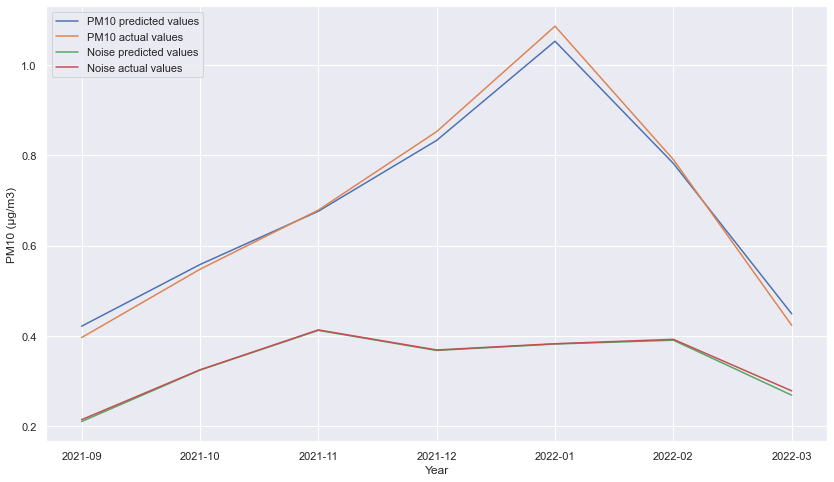

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.277021,0.377261,0.142696,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.354271,0.377261,0.154450,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.369100,0.444197,0.146021,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.426360,0.354949,0.161923,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.380590,0.421885,0.156784,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.414313,0.377261,0.136868,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.403210,0.377261,0.152051,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.399614,0.377261,0.146917,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [21]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[
    RootMeanSquaredError(),
    MeanAbsolutePercentageError()
])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 34)            6936      
                                                                 
 lstm_5 (LSTM)               (None, 64)                25344     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 79s 23ms/step - loss: 0.0750 - root_mean_squared_error: 0.2738 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2214
Epoch 

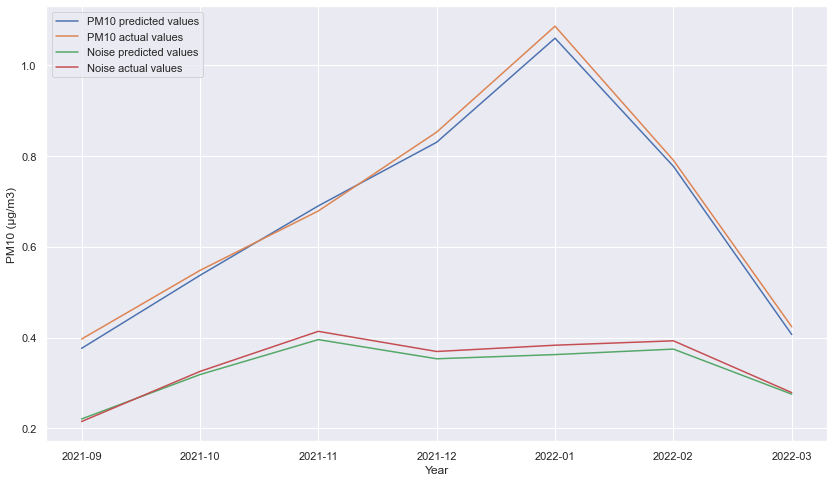

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.253716,0.377261,0.166163,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.326344,0.377261,0.189987,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.342609,0.444197,0.175273,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.398228,0.354949,0.189678,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.348914,0.421885,0.178866,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.378501,0.377261,0.163517,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.366741,0.377261,0.177948,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.360676,0.377261,0.172522,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [22]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 34)            6936      
                                                                 
 lstm_7 (LSTM)               (None, 64)                25344     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 80s 24ms/step - loss: 0.0758 - root_mean_squared_error: 0.2753 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2218
Epoch 

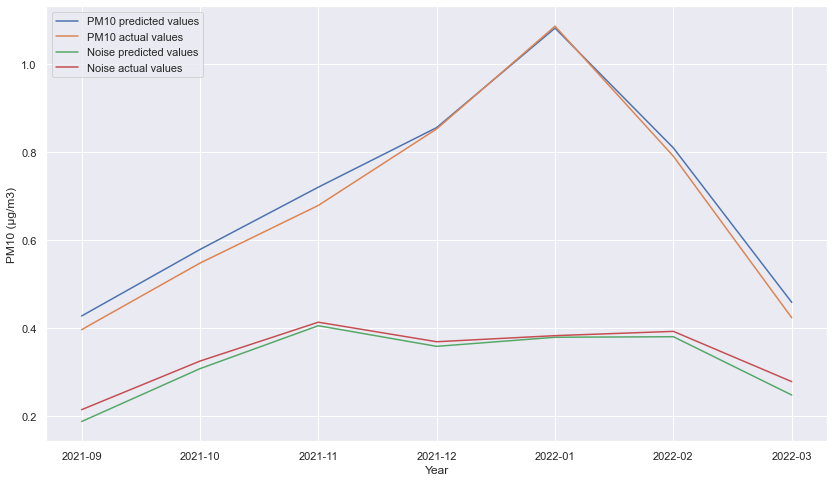

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.295321,0.377261,0.122887,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.370944,0.377261,0.133859,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.381882,0.444197,0.119824,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.438067,0.354949,0.133409,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.388973,0.421885,0.130674,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.420352,0.377261,0.117756,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.414417,0.377261,0.137402,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.410350,0.377261,0.135086,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [23]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 24, 34)            6936      
                                                                 
 lstm_9 (LSTM)               (None, 64)                25344     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 82s 24ms/step - loss: 0.1223 - root_mean_squared_error: 0.3497 - val_loss: 0.0766 - val_root_mean_squared_error: 0.2768
Epoch 

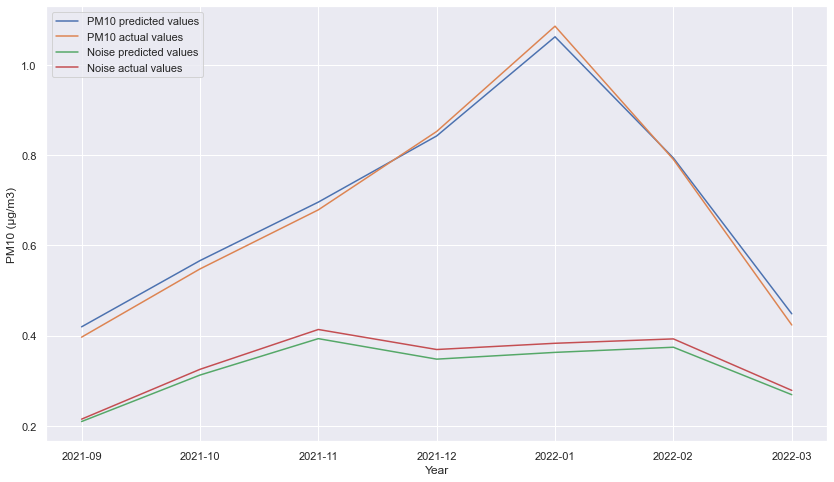

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.275637,0.377261,0.136713,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.351610,0.377261,0.148298,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.363470,0.444197,0.144103,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.421823,0.354949,0.158450,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.369762,0.421885,0.156972,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.402939,0.377261,0.146029,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.395387,0.377261,0.161850,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.391382,0.377261,0.155153,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [24]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 24, 34)            6936      
                                                                 
 lstm_11 (LSTM)              (None, 64)                25344     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 32,818
Trainable params: 32,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 82s 24ms/step - loss: 0.0626 - root_mean_squared_error: 0.2502 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2218
Epoch 

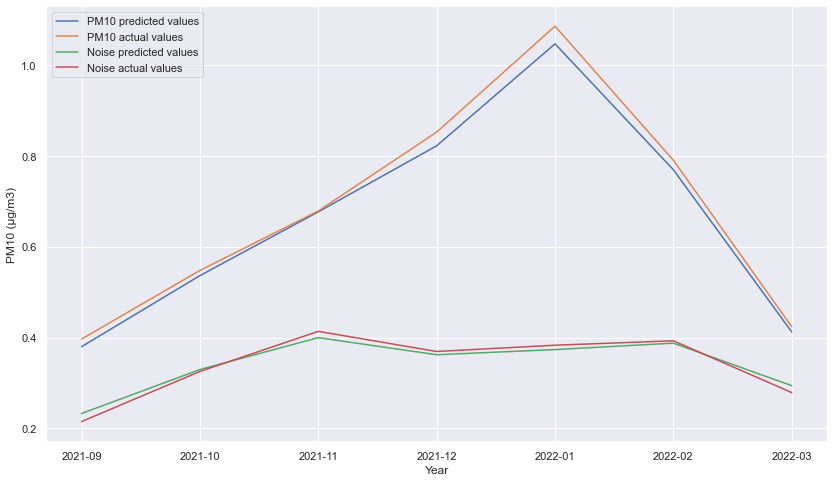

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.239296,0.377261,0.163851,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.305547,0.377261,0.188713,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.325204,0.444197,0.175786,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.381479,0.354949,0.191500,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.341962,0.421885,0.184641,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.368957,0.377261,0.164638,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.356738,0.377261,0.177802,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.351633,0.377261,0.171779,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [25]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(34, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                15744     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 42s 13ms/step - loss: 0.0900 - root_mean_squared_error: 0.3000 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2144
Epoch 2/10
3218/3218 [==============================] - 40s 12ms/step - loss: 0.0404 - root_mean_squared_error: 0.2009 - val_loss: 0.0400 

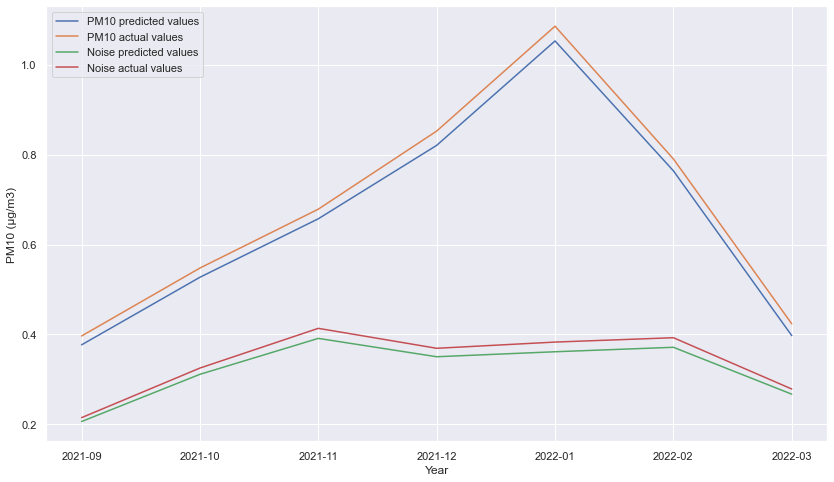

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.228251,0.377261,0.133467,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.314741,0.377261,0.151475,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.330363,0.444197,0.144638,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.390436,0.354949,0.158722,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.334026,0.421885,0.154890,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.340618,0.377261,0.128958,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.327546,0.377261,0.143352,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.318867,0.377261,0.138854,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [26]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                15744     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 41s 12ms/step - loss: 0.1020 - root_mean_squared_error: 0.3193 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2144
Epoch 2/10
3218/3218 [==============================] - 39s 12ms/step - loss: 0.0409 - root_mean_squared_error: 0.2021 - val_loss: 0.0391 

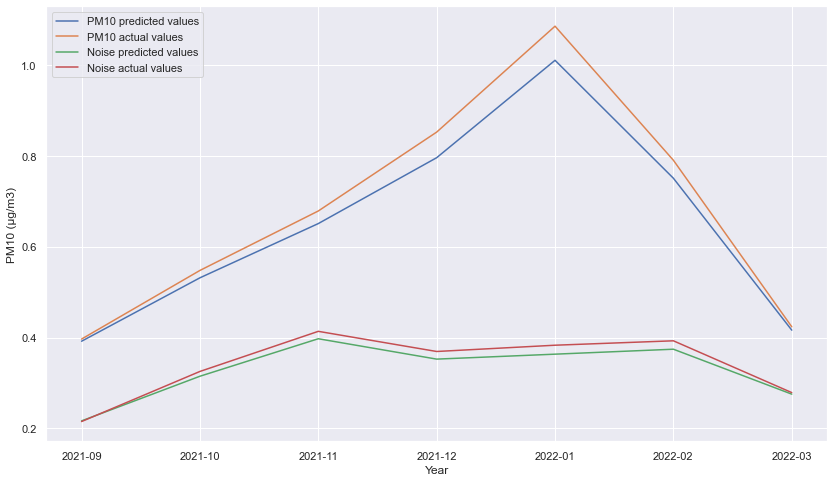

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.291861,0.377261,0.158579,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.357095,0.377261,0.176410,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.369438,0.444197,0.165544,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.414516,0.354949,0.179983,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.369424,0.421885,0.171481,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.401696,0.377261,0.163227,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.387722,0.377261,0.174876,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.381805,0.377261,0.168055,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [27]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                15744     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 41s 12ms/step - loss: 0.0977 - root_mean_squared_error: 0.3126 - val_loss: 0.0524 - val_root_mean_squared_error: 0.2290
Epoch 2/10
3218/3218 [==============================] - 39s 12ms/step - loss: 0.0426 - root_mean_squared_error: 0.2064 - val_loss: 0.0421

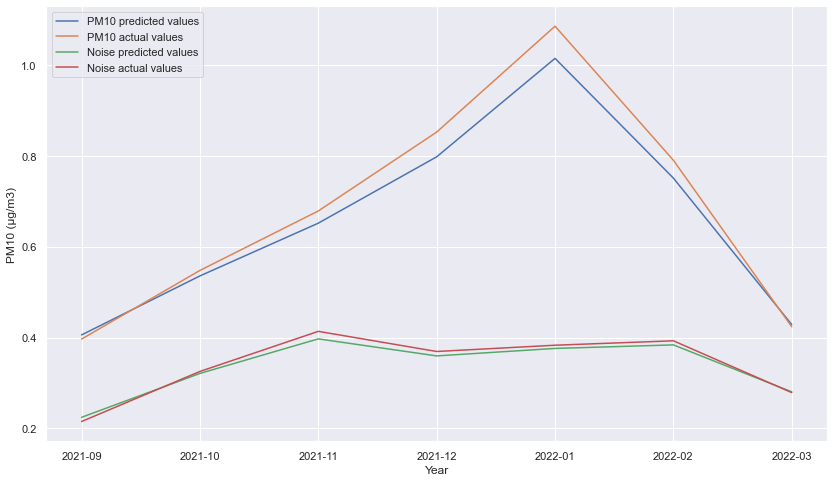

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.277353,0.377261,0.155104,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.352962,0.377261,0.170856,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.369514,0.444197,0.166306,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.422744,0.354949,0.179284,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.377321,0.421885,0.175568,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.413493,0.377261,0.161374,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.399646,0.377261,0.173961,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.391954,0.377261,0.168680,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [28]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                15744     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 2)                 18        
                                                                 
Total params: 16,282
Trainable params: 16,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 42s 13ms/step - loss: 0.0571 - root_mean_squared_error: 0.2389 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2090
Epoch 2/10
3218/3218 [==============================] - 42s 13ms/step - loss: 0.0392 - root_mean_squared_error: 0.1979 - val_loss: 0.0406

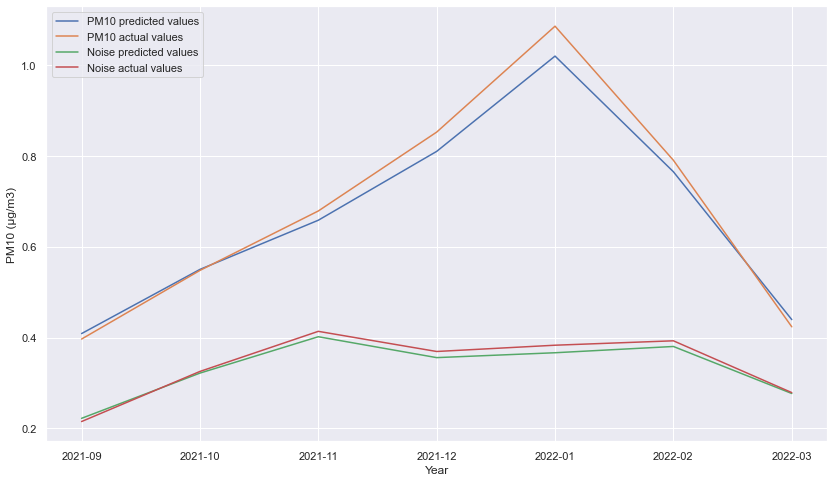

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.263756,0.377261,0.152120,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.358479,0.377261,0.174744,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.369383,0.444197,0.163948,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.439355,0.354949,0.182775,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.376210,0.421885,0.175149,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.414351,0.377261,0.155669,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.399272,0.377261,0.174273,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.388785,0.377261,0.168484,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [29]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(GRU(64))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 64)            2112      
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                                 
 dense_24 (Dense)            (None, 8)                 11784     
                                                                 
 dense_25 (Dense)            (None, 2)                 18        
                                                                 
Total params: 13,914
Trainable params: 13,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 12s 4ms/step - loss: 0.4294 - root_mean_squared_error: 0.6553 - val_loss: 0.1391 - val_root_mean_squared_error: 0.3729
Epoch 

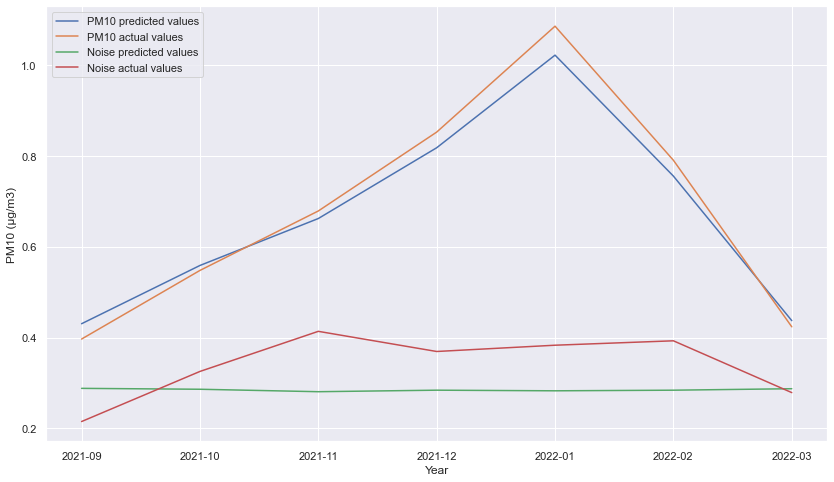

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.305233,0.377261,0.281618,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.405525,0.377261,0.286830,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.359688,0.444197,0.284448,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.455623,0.354949,0.289434,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.340785,0.421885,0.283466,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.324197,0.377261,0.282604,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.380631,0.377261,0.285536,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.345892,0.377261,0.283731,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [30]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 23, 64)            2112      
                                                                 
 flatten_1 (Flatten)         (None, 1472)              0         
                                                                 
 dense_26 (Dense)            (None, 8)                 11784     
                                                                 
 dense_27 (Dense)            (None, 2)                 18        
                                                                 
Total params: 13,914
Trainable params: 13,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 12s 3ms/step - loss: 0.2352 - root_mean_squared_error: 0.4850 - val_loss: 0.1652 - val_root_mean_squared_error: 0.4065
Epoch 

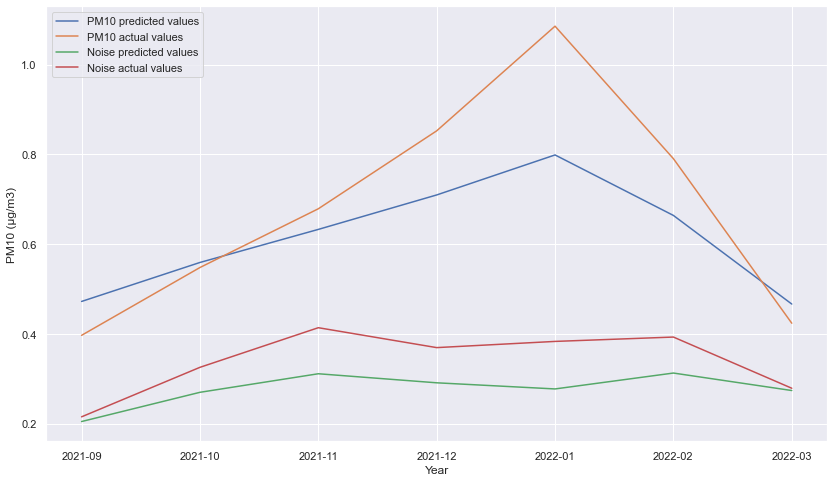

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.446143,0.377261,0.170395,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.451023,0.377261,0.169779,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.450324,0.444197,0.164859,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.456618,0.354949,0.178275,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.459068,0.421885,0.173362,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.454283,0.377261,0.167520,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.447489,0.377261,0.156720,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.446829,0.377261,0.156545,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [31]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 23, 64)            2112      
                                                                 
 flatten_2 (Flatten)         (None, 1472)              0         
                                                                 
 dense_28 (Dense)            (None, 8)                 11784     
                                                                 
 dense_29 (Dense)            (None, 2)                 18        
                                                                 
Total params: 13,914
Trainable params: 13,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 11s 3ms/step - loss: 0.2800 - root_mean_squared_error: 0.5291 - val_loss: 0.2692 - val_root_mean_squared_error: 0.5188
Epoch 

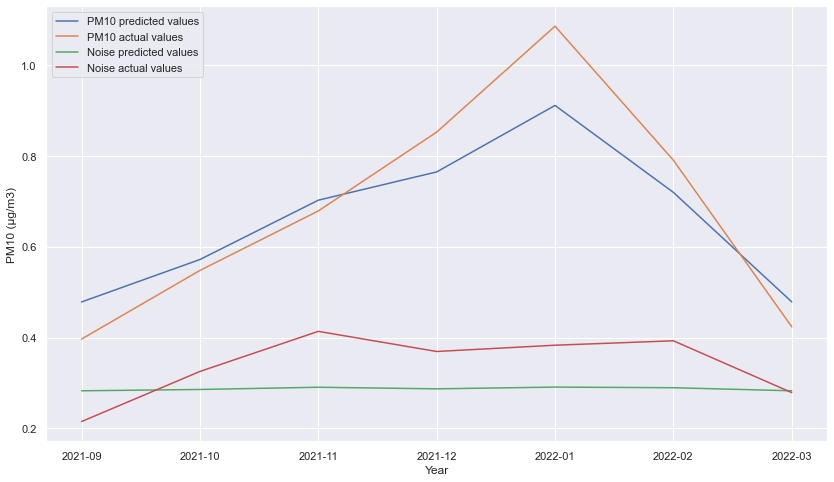

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.478378,0.377261,0.282757,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.478378,0.377261,0.282757,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.478378,0.444197,0.282757,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.478378,0.354949,0.282757,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.478378,0.421885,0.282757,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.478378,0.377261,0.282757,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.478378,0.377261,0.282757,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.478378,0.377261,0.282757,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [32]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 23, 64)            2112      
                                                                 
 flatten_3 (Flatten)         (None, 1472)              0         
                                                                 
 dense_30 (Dense)            (None, 8)                 11784     
                                                                 
 dense_31 (Dense)            (None, 2)                 18        
                                                                 
Total params: 13,914
Trainable params: 13,914
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [==============================] - 11s 3ms/step - loss: 0.4061 - root_mean_squared_error: 0.6373 - val_loss: 0.1382 - val_root_mean_squared_error: 0.3718
Epoch 

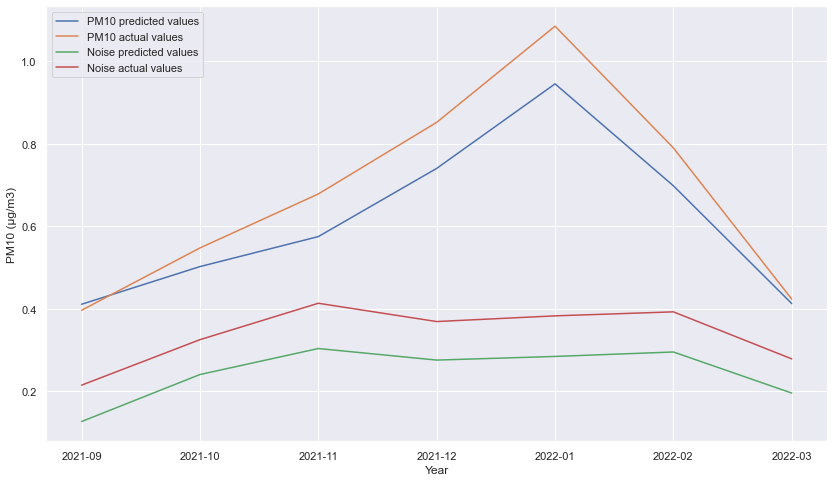

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.309111,0.377261,-0.000839,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.399597,0.377261,0.029083,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.415578,0.444197,0.033553,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.498471,0.354949,0.068787,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.421485,0.421885,0.037912,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.510700,0.377261,0.079726,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.364114,0.377261,-0.055196,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.476371,0.377261,0.052132,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [33]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 24, 64)            20736     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_32 (Dense)            (None, 8)                 264       
                                                                 
 dense_33 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [===========================

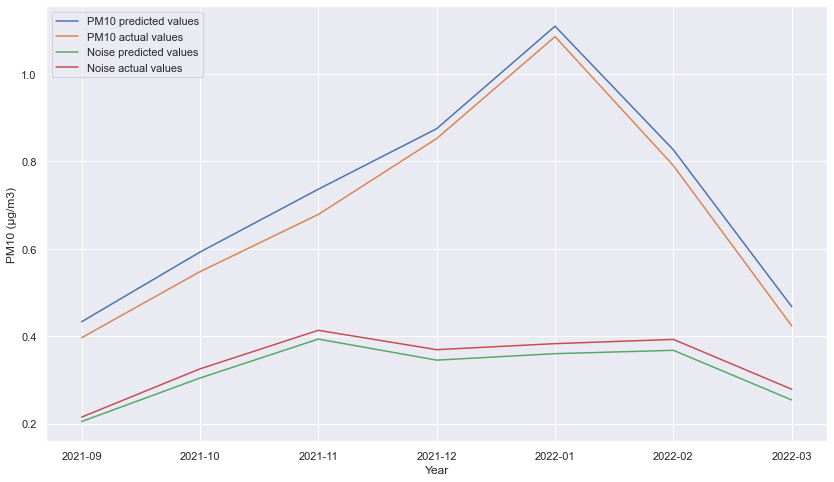

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.289599,0.377261,0.161384,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.381581,0.377261,0.161258,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.395695,0.444197,0.151614,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.449058,0.354949,0.157574,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.409692,0.421885,0.149546,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.439969,0.377261,0.131384,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.430086,0.377261,0.139712,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.425313,0.377261,0.141787,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [34]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 24, 64)            20736     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_34 (Dense)            (None, 8)                 264       
                                                                 
 dense_35 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [===========================

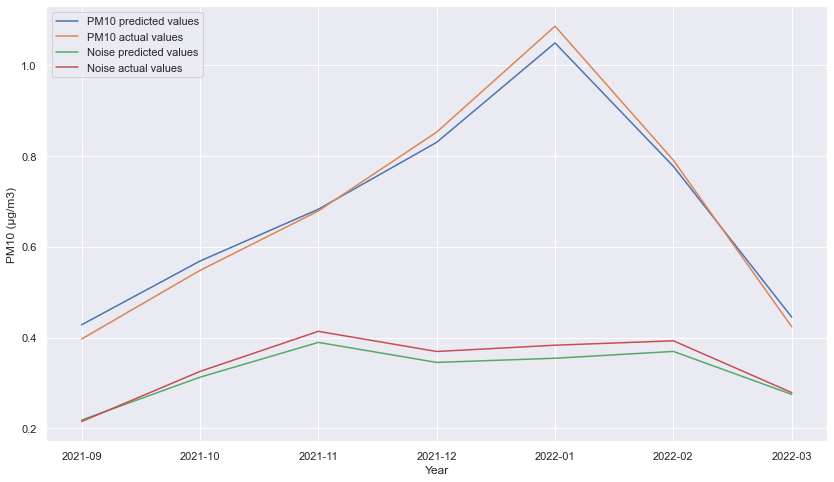

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.288114,0.377261,0.155501,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.369867,0.377261,0.164635,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.383824,0.444197,0.158104,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.436535,0.354949,0.173361,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.401128,0.421885,0.167579,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.420118,0.377261,0.157657,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.412514,0.377261,0.161190,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.409406,0.377261,0.158602,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [35]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 24, 64)            20736     
                                                                 
 dropout_2 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_36 (Dense)            (None, 8)                 264       
                                                                 
 dense_37 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [===========================

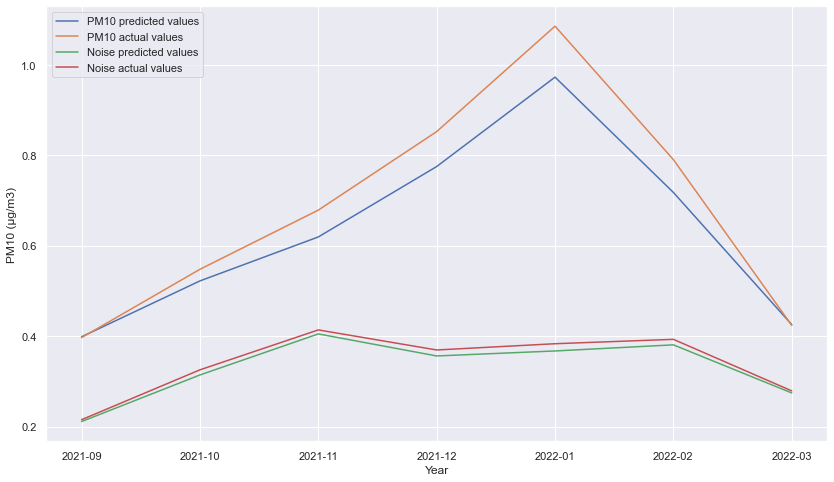

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.275061,0.377261,0.153696,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.349742,0.377261,0.156738,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.355260,0.444197,0.152640,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.403939,0.354949,0.161655,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.359318,0.421885,0.161444,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.381507,0.377261,0.151088,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.372736,0.377261,0.160882,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.368236,0.377261,0.163047,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [36]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 24, 64)            20736     
                                                                 
 dropout_3 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_38 (Dense)            (None, 8)                 264       
                                                                 
 dense_39 (Dense)            (None, 2)                 18        
                                                                 
Total params: 33,434
Trainable params: 33,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3218/3218 [===========================

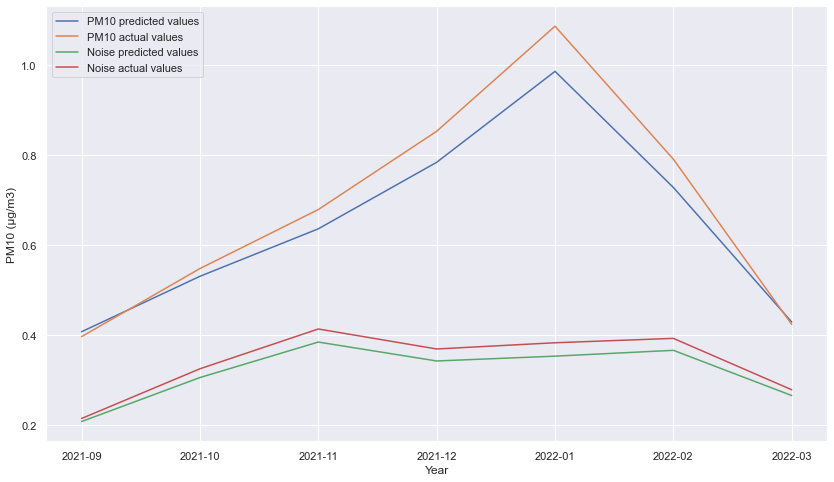

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.288472,0.377261,0.170033,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.386181,0.377261,0.165964,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.376883,0.444197,0.147326,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.430965,0.354949,0.154483,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.383600,0.421885,0.148051,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.409832,0.377261,0.139208,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.396748,0.377261,0.143823,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.386913,0.377261,0.153332,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [37]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))

model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24, 128)           18560     
                                                                 
 lstm_20 (LSTM)              (None, 24, 64)            49408     
                                                                 
 dropout_4 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_40 (Dense)            (None, 8)                 264       
                                                                 
 dense_41 (Dense)            (None, 2)                 18        
                                                                 
Total params: 80,666
Trainable params: 80,666
Non-tra

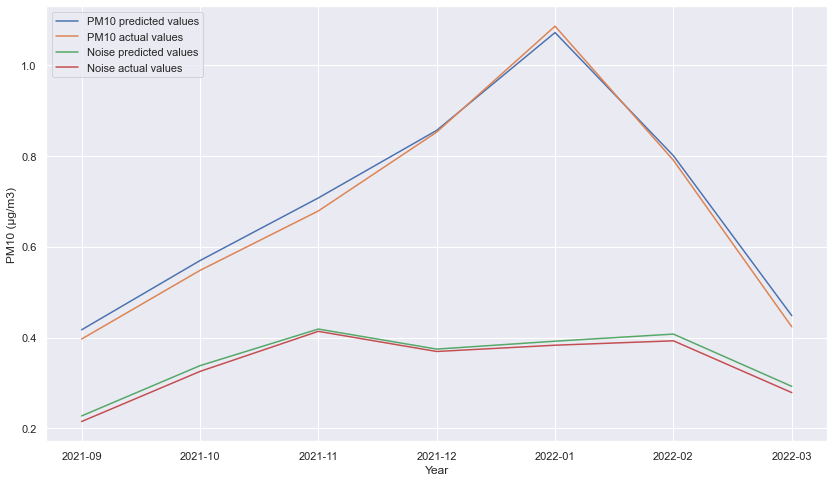

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.308869,0.377261,0.159810,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.397520,0.377261,0.190985,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.393409,0.444197,0.167439,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.425890,0.354949,0.178608,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.395457,0.421885,0.168676,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.408970,0.377261,0.153732,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.404233,0.377261,0.160704,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.407072,0.377261,0.161757,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [38]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 24, 128)           18560     
                                                                 
 lstm_22 (LSTM)              (None, 24, 64)            49408     
                                                                 
 dropout_5 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_42 (Dense)            (None, 8)                 264       
                                                                 
 dense_43 (Dense)            (None, 2)                 18        
                                                                 
Total params: 80,666
Trainable params: 80,666
Non-tra

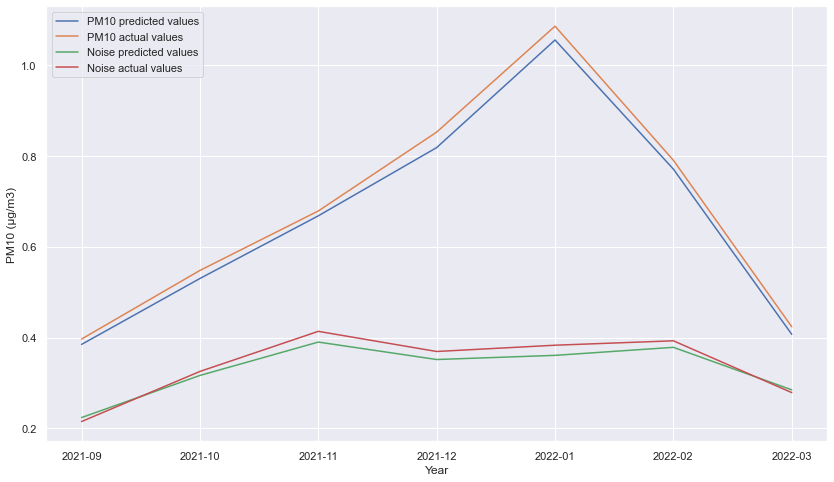

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.254928,0.377261,0.155981,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.339866,0.377261,0.154781,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.344936,0.444197,0.160390,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.400201,0.354949,0.156416,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.359623,0.421885,0.160031,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.386974,0.377261,0.160172,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.371768,0.377261,0.156248,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.364686,0.377261,0.154823,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [39]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 24, 128)           18560     
                                                                 
 lstm_24 (LSTM)              (None, 24, 64)            49408     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_44 (Dense)            (None, 8)                 264       
                                                                 
 dense_45 (Dense)            (None, 2)                 18        
                                                                 
Total params: 80,666
Trainable params: 80,666
Non-tra

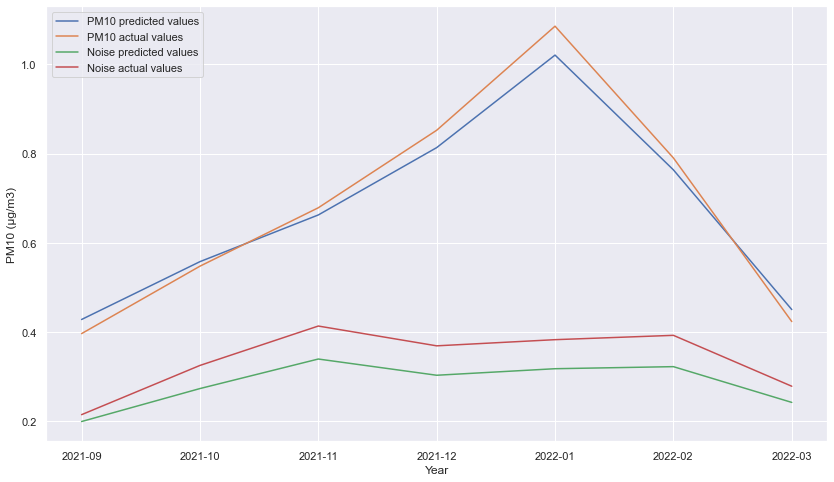

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.320953,0.377261,0.141539,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.379272,0.377261,0.149448,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.384193,0.444197,0.154285,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.422805,0.354949,0.172494,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.388618,0.421885,0.161711,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.421905,0.377261,0.141437,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.409061,0.377261,0.152419,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.401769,0.377261,0.150035,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [40]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 24, 128)           18560     
                                                                 
 lstm_26 (LSTM)              (None, 24, 64)            49408     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_46 (Dense)            (None, 8)                 264       
                                                                 
 dense_47 (Dense)            (None, 2)                 18        
                                                                 
Total params: 80,666
Trainable params: 80,666
Non-tra

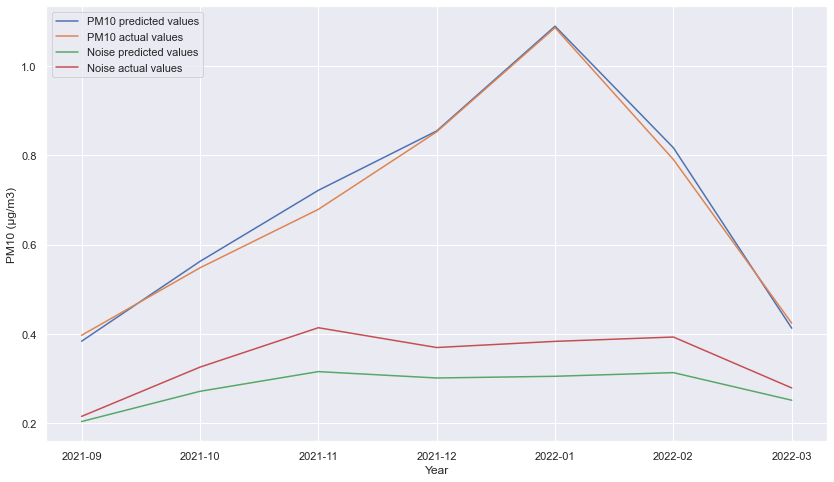

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.241380,0.377261,0.131115,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.324871,0.377261,0.139083,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.349669,0.444197,0.137772,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.395447,0.354949,0.154166,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.348162,0.421885,0.146048,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.384263,0.377261,0.126865,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.366227,0.377261,0.133770,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.360293,0.377261,0.125591,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [41]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(SimpleRNN(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(32))
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 23, 64)            2112      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 704)               0         
                                                                 
 dense_48 (Dense)            (None, 8)                 5640      
                                                                 
 dense_49 (Dense)            (None, 2)                 18        
                                                                 
Total params: 7,770
Trainable params: 7,770
Non-trainable params: 0
___________________________________________________

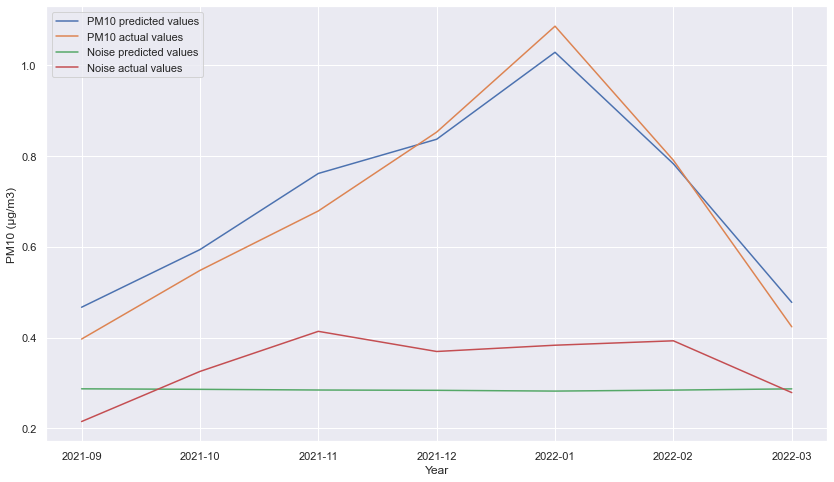

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.46674,0.377261,0.287097,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.46674,0.377261,0.287097,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.46674,0.444197,0.287097,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.46674,0.354949,0.287097,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.46674,0.421885,0.287097,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.46674,0.377261,0.287097,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.46674,0.377261,0.287097,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.46674,0.377261,0.287097,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [42]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 23, 64)            2112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 704)               0         
                                                                 
 dense_50 (Dense)            (None, 8)                 5640      
                                                                 
 dense_51 (Dense)            (None, 2)                 18        
                                                                 
Total params: 7,770
Trainable params: 7,770
Non-trainable params: 0
___________________________________________________

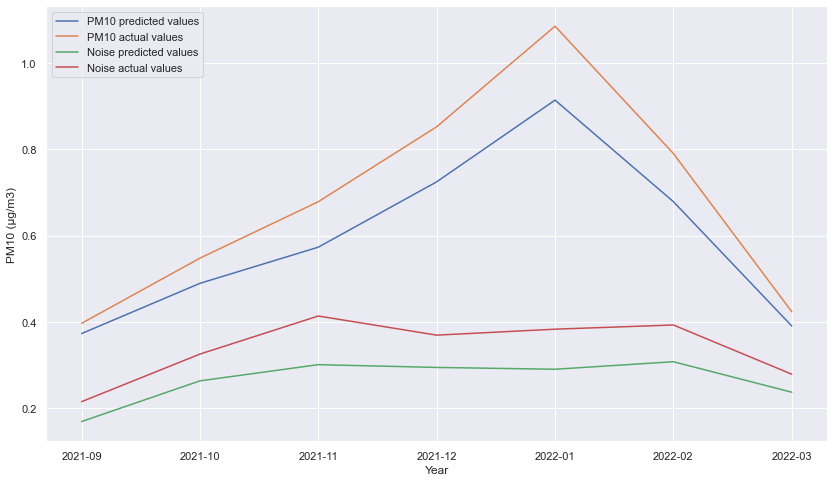

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.226510,0.377261,0.144368,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.252109,0.377261,0.098674,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.197776,0.444197,0.043508,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.292300,0.354949,0.089039,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.324571,0.421885,0.062927,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.399534,0.377261,0.233433,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.397941,0.377261,0.142959,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.269443,0.377261,0.069232,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [43]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'tanh'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 23, 64)            2112      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 704)               0         
                                                                 
 dense_52 (Dense)            (None, 8)                 5640      
                                                                 
 dense_53 (Dense)            (None, 2)                 18        
                                                                 
Total params: 7,770
Trainable params: 7,770
Non-trainable params: 0
___________________________________________________

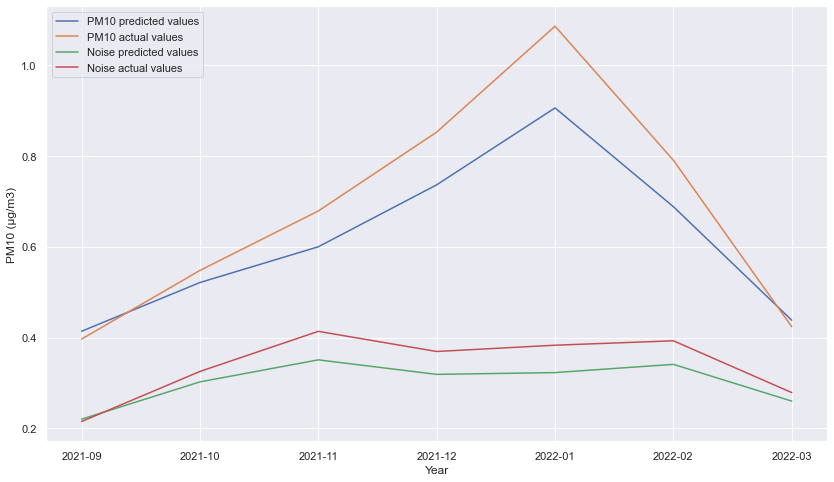

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.291218,0.377261,0.222000,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.298097,0.377261,0.206325,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.330965,0.444197,0.183764,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.347627,0.354949,0.158577,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.388172,0.421885,0.152085,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.373787,0.377261,0.177366,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.374854,0.377261,0.181158,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.386588,0.377261,0.143732,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [44]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'sigmoid'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 23, 64)            2112      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 704)               0         
                                                                 
 dense_54 (Dense)            (None, 8)                 5640      
                                                                 
 dense_55 (Dense)            (None, 2)                 18        
                                                                 
Total params: 7,770
Trainable params: 7,770
Non-trainable params: 0
___________________________________________________

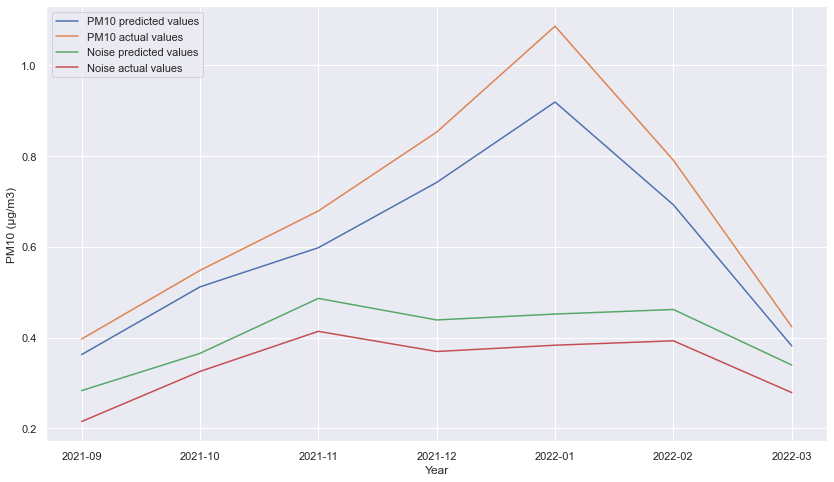

,PM10 predictions,PM10 actuals,Noise predictions,Noise actuals,sensor_id,log,lat,Year,YM
date_time,,,,,,,,,
2021-09-26 23:15:00,0.272186,0.377261,0.364203,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:30:00,0.355004,0.377261,0.276754,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-26 23:45:00,0.333524,0.444197,0.227700,0.196429,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:00:00,0.348891,0.354949,0.249685,0.178571,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
2021-09-27 00:15:00,0.328647,0.421885,0.264188,0.160714,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2021,2021-09
...,...,...,...,...,...,...,...,...,...
2022-03-02 22:45:00,0.263549,0.377261,0.336713,0.184524,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:00:00,0.357243,0.377261,0.355397,0.172619,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03
2022-03-02 23:15:00,0.204945,0.377261,0.206448,0.166667,200cdb67-8dc5-4dcf-ac62-748db636e04e,21.456479,41.975155,2022,2022-03


In [45]:
model = Sequential()
model.add(InputLayer(input_size))
model.add(Conv1D(64, kernel_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, 'selu'))
model.add(Dense(output_size, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model.summary()

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

plot_predictions(model, X_test, y_test, y_test_df)